In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
# Load processed data
with open('data/lookup_tables/songs_dict.json', 'r') as f:
    data = json.load(f)

# Extract keys and time signatures
keys = []
time_sigs = []

for song_id, song_data in data.items():
    if 'key' in song_data:
        keys.append(song_data['key'])
    if 'time_signature' in song_data:
        time_sigs.append(song_data['time_signature'])

In [3]:
# Count frequencies
key_counts = Counter(keys)
time_sig_counts = Counter(time_sigs)

# Prepare data for plotting
top_keys = [k for k, _ in key_counts.most_common(10)]
top_key_counts = [key_counts[k] for k in top_keys]

top_time_sigs = [ts for ts, _ in time_sig_counts.most_common(5)]
top_time_sig_counts = [time_sig_counts[ts] for ts in top_time_sigs]

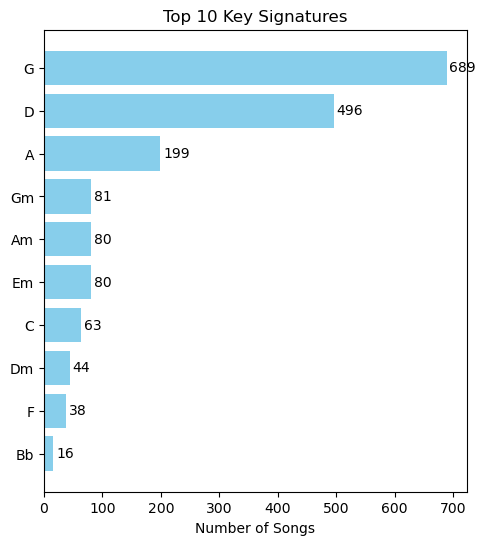

In [4]:
# Create figure with two subplots
plt.figure(figsize=(12, 6))

# Key distribution plot
plt.subplot(1, 2, 1)
bars = plt.barh(top_keys, top_key_counts, color='skyblue')
plt.xlabel('Number of Songs')
plt.title('Top 10 Key Signatures')
plt.gca().invert_yaxis()  # Show highest count at top

# Add counts on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center')

In [5]:
# Time signature distribution plot
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(
    top_time_sig_counts,
    labels=top_time_sigs,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightgreen', 'gold', 'lightskyblue', 'plum']
)
plt.title('Time Signature Distribution')

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')  

# Adjust layout and save
plt.tight_layout()
plt.savefig('output/figs/data_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

print("Saved data distribution visualization to output/figures/data_distribution.png")

Saved data distribution visualization to output/figures/data_distribution.png
